In [15]:
import pandas as pd
import numpy as np
data = pd.read_csv('actividad_marissa.txt', sep=r",", header=None)

# La primera columna es la clase
y = data.iloc[:, 0].values
# El resto son variables predictoras
x = data.iloc[:, 1:].values

In [16]:
y

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       3., 3., 3., 3., 3.

MODELOS 

In [27]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# Clasificadores
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# Lista de clasificadores
classifiers = {
    "SVM lineal": SVC(kernel='linear'),
    "SVM RBF": SVC(kernel='rbf'),
    "LDA": LDA(),
    "K-NN": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # 2 capas ocultas
}

# Cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    print(f"\n Clasificador: {name}")
    
    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x, y):
        x_train = x[train_index, :]
        y_train = y[train_index]
        x_test = x[test_index, :]
        y_test = y[test_index]

        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    # Reporte de métricas
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))



 Clasificador: SVM lineal
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96        60
         2.0       0.87      0.91      0.89       100
         3.0       0.98      0.87      0.92       100
         4.0       0.91      0.95      0.93       120
         5.0       0.94      0.99      0.96       110
         6.0       0.92      0.85      0.89       110

    accuracy                           0.92       600
   macro avg       0.93      0.93      0.92       600
weighted avg       0.92      0.92      0.92       600


 Clasificador: SVM RBF
              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96        60
         2.0       0.92      0.78      0.84       100
         3.0       0.96      0.87      0.91       100
         4.0       0.87      0.91      0.89       120
         5.0       0.89      0.99      0.94       110
         6.0       0.80      0.88      0.84       110

    accuracy              

RENDIMIENTOS 

- MLP

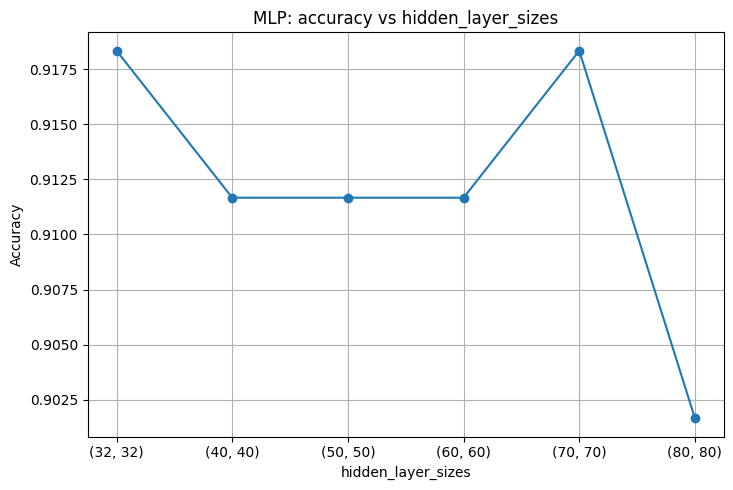

In [18]:
'''
MLP (Multilayer Perceptron)
Tiene muchos hiperparámetros importantes, como:

- hidden_layer_sizes → número y tamaño de las capas ocultas
- activation → función de activación (ej. 'relu', 'tanh')
-solver → método de optimización (ej. 'adam', 'sgd')
- alpha → regularización L2
- learning_rate → constante o adaptativo
- max_iter → número de iteraciones de entrenamiento

'''

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------- MLP ----------
mlp_configs = [
    (32, 32),
    (40, 40),
    (50, 50),   # referencia
    (60, 60),
    (70, 70),
    (80, 80)
]


mlp_scores = []

for config in mlp_configs:
    clf = MLPClassifier(hidden_layer_sizes=config, max_iter=1000, random_state=42)
    score = cross_val_score(clf, x, y, cv=cv, scoring='accuracy').mean()
    mlp_scores.append(score)


# ---------- Graficar ----------
plt.figure(figsize=(14, 5))

# MLP plot
plt.subplot(1, 2, 1)
plt.plot([str(cfg) for cfg in mlp_configs], mlp_scores, marker='o')
plt.title("MLP: accuracy vs hidden_layer_sizes")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np

print("----- Model evaluation with CV and GridSearchCV (MLP) -----")

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_y_test = []
cv_y_pred = []

# Definimos la grilla de hiperparámetros para el MLP
parameter_grid = {
    'hidden_layer_sizes': [
        (32, 32), (40, 40), (50, 50), (60, 60), (70, 70),
        (50, 25), (60, 40), (40, 60), (70, 50)
    ]
}

for train_index, test_index in kf.split(x, y):
    
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    # GridSearchCV con MLPClassifier
    clf_cv = GridSearchCV(
        MLPClassifier(max_iter=1000, random_state=42),
        parameter_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    clf_cv.fit(x_train, y_train)
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Model evaluation with CV and GridSearchCV (MLP) -----


              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        60
         2.0       0.93      0.91      0.92       100
         3.0       0.95      0.86      0.90       100
         4.0       0.90      0.93      0.92       120
         5.0       0.89      0.97      0.93       110
         6.0       0.92      0.92      0.92       110

    accuracy                           0.92       600
   macro avg       0.93      0.92      0.93       600
weighted avg       0.92      0.92      0.92       600



- SVM lineal

----- SVM classifier - Regularization parameter -----
---- c = 1e-06
ACC: 0.20166666666666666
---- c = 2.335721469090121e-06
ACC: 0.2616666666666666
---- c = 5.455594781168514e-06
ACC: 0.275
---- c = 1.274274985703132e-05
ACC: 0.335
---- c = 2.9763514416313192e-05
ACC: 0.41000000000000003
---- c = 6.951927961775606e-05
ACC: 0.42333333333333323
---- c = 0.0001623776739188721
ACC: 0.7816666666666666
---- c = 0.000379269019073225
ACC: 0.86
---- c = 0.0008858667904100823
ACC: 0.8950000000000001
---- c = 0.002069138081114788
ACC: 0.9149999999999998
---- c = 0.004832930238571752
ACC: 0.9349999999999999
---- c = 0.011288378916846883
ACC: 0.9283333333333333
---- c = 0.026366508987303555
ACC: 0.9266666666666667
---- c = 0.061584821106602544
ACC: 0.9283333333333333
---- c = 0.14384498882876628
ACC: 0.9266666666666667
---- c = 0.3359818286283781
ACC: 0.9266666666666665
---- c = 0.7847599703514607
ACC: 0.9183333333333333
---- c = 1.8329807108324339
ACC: 0.8933333333333333
---- c = 4.28133239871938

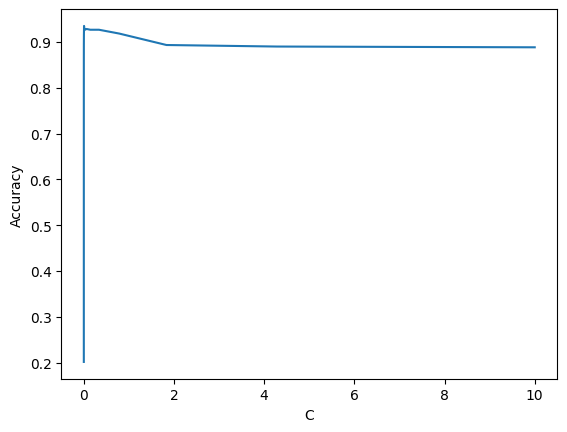

SVC(C=np.float64(0.004832930238571752), kernel='linear')

In [29]:
print("----- SVM classifier - Regularization parameter -----")

cc = np.logspace(-6, 1, 20)  # desde 1e-6 hasta 10

acc = []

for c in cc:
    print('---- c =', c)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = SVC(C=c, kernel='linear')             

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal c: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal hyperparameters
clf = SVC(C=opt_hyperparameter, kernel = 'linear')   
clf.fit(x, y)

In [21]:
#------------------------------------------------------------------------------------------------------------------
# Model evaluation with hyperparameter selection using GridSearchCV
#------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV

print("----- Model evaluation with CV and GridSearchCV -----")
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    
    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    parameters = {'C': np.logspace(-6, 1, 20)}
    clf_cv = GridSearchCV(SVC(), parameters, cv = 5)
    clf_cv.fit(x_train, y_train)

    y_pred = clf_cv.predict(x_test)
    
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Model evaluation with CV and GridSearchCV -----
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.97        60
         2.0       0.90      0.95      0.93       100
         3.0       0.98      0.92      0.95       100
         4.0       0.92      0.95      0.93       120
         5.0       0.92      0.99      0.96       110
         6.0       0.96      0.88      0.92       110

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



- KNN

----- KNN classifier - K parameter -----
---- k = 1
ACC: 0.93
---- k = 2
ACC: 0.9283333333333333
---- k = 3
ACC: 0.9349999999999999
---- k = 4
ACC: 0.9399999999999998
---- k = 5
ACC: 0.9333333333333333
---- k = 6
ACC: 0.9316666666666666
---- k = 7
ACC: 0.9316666666666669
---- k = 8
ACC: 0.9316666666666666
---- k = 9
ACC: 0.9283333333333333
---- k = 10
ACC: 0.9283333333333333
---- k = 11
ACC: 0.9283333333333333
---- k = 12
ACC: 0.9283333333333333
---- k = 13
ACC: 0.9200000000000002
---- k = 14
ACC: 0.9166666666666667
---- k = 15
ACC: 0.9166666666666666
---- k = 16
ACC: 0.9166666666666666
---- k = 17
ACC: 0.9116666666666667
---- k = 18
ACC: 0.9133333333333333
---- k = 19
ACC: 0.9099999999999999
---- k = 20
ACC: 0.9116666666666667
---- k = 21
ACC: 0.9116666666666667
---- k = 22
ACC: 0.9099999999999999
---- k = 23
ACC: 0.8966666666666667
---- k = 24
ACC: 0.9066666666666666
---- k = 25
ACC: 0.9
---- k = 26
ACC: 0.8966666666666667
---- k = 27
ACC: 0.8983333333333334
---- k = 28
ACC: 0.898333

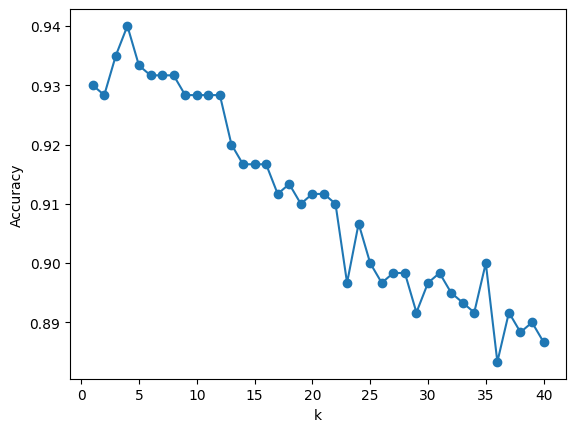

KNeighborsClassifier(n_neighbors=np.int64(4))

In [22]:
print("----- KNN classifier - K parameter -----")

kk = np.arange(1,41)

acc = []

for k in kk:
    print('---- k =', k)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = KNeighborsClassifier(n_neighbors=k)             

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = kk[opt_index]
print("Optimal k: ", opt_hyperparameter)

plt.plot(kk, acc, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal hyperparameters
clf = KNeighborsClassifier(n_neighbors=opt_hyperparameter)   
clf.fit(x, y)

In [23]:
#------------------------------------------------------------------------------------------------------------------
# Model evaluation with hyperparameter selection using GridSearchCV
#------------------------------------------------------------------------------------------------------------------

print("----- Model evaluation with CV and GridSearchCV -----")
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    
    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    parameters = {'n_neighbors': np.arange(1, 39)} #no de car: 38
    clf_cv = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5)
    clf_cv.fit(x_train, y_train)

    y_pred = clf_cv.predict(x_test)
    
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Model evaluation with CV and GridSearchCV -----
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        60
         2.0       0.95      0.95      0.95       100
         3.0       0.97      0.91      0.94       100
         4.0       0.88      0.96      0.92       120
         5.0       0.93      0.96      0.95       110
         6.0       0.94      0.90      0.92       110

    accuracy                           0.94       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



REDUCCION DE FEATURES

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.5766666666666667
---- n features = 2
ACC: 0.6849999999999999
---- n features = 3
ACC: 0.7566666666666666
---- n features = 4
ACC: 0.8316666666666668
---- n features = 5
ACC: 0.8316666666666667
---- n features = 6
ACC: 0.8783333333333333
---- n features = 7
ACC: 0.8933333333333333
---- n features = 8
ACC: 0.9
---- n features = 9
ACC: 0.885
---- n features = 10
ACC: 0.905
---- n features = 11
ACC: 0.9216666666666666
---- n features = 12
ACC: 0.8833333333333334
---- n features = 13
ACC: 0.915
---- n features = 14
ACC: 0.905
---- n features = 15
ACC: 0.9099999999999999
---- n features = 16
ACC: 0.905
---- n features = 17
ACC: 0.9199999999999999
---- n features = 18
ACC: 0.9216666666666666
---- n features = 19
ACC: 0.905
---- n features = 20
ACC: 0.9183333333333333
---- n features = 21
ACC: 0.9166666666666666
---- n features = 22
ACC: 0.9
---- n features = 23
ACC: 0.9183333333333333
---- n features = 24
ACC: 0.91

/Users/marissaluna/Documents/ML_project/venv/lib/python3.13/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=38 > n_features=37. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/marissaluna/Documents/ML_project/venv/lib/python3.13/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=38 > n_features=37. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/marissaluna/Documents/ML_project/venv/lib/python3.13/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=38 > n_features=37. There will be no feature selection and all features will be kept.
  warnings.warn(
/Users/marissaluna/Documents/ML_project/venv/lib/python3.13/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=38 > n_features=37. There will be no feature selection and all features will be

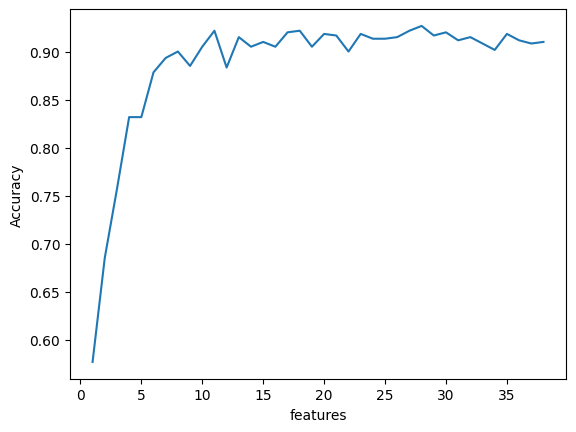

Selected features:  ['x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x10' 'x11' 'x14' 'x15' 'x16' 'x17' 'x18'
 'x19' 'x20' 'x21' 'x22' 'x23' 'x25' 'x27' 'x28' 'x30' 'x31' 'x32' 'x33'
 'x34' 'x35' 'x36']


SVC(kernel='linear')

In [24]:
#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
#------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import RFE

print("----- Optimal selection of number of features -----")

n_feats = list(range(1, 39))  # del 1 al 38


acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

---- n features = 1
ACC: 0.5533333333333333
---- n features = 2
ACC: 0.6583333333333334
---- n features = 3
ACC: 0.75
---- n features = 4
ACC: 0.8049999999999999
---- n features = 5
ACC: 0.8966666666666667
---- n features = 6
ACC: 0.905
---- n features = 7
ACC: 0.9116666666666667
---- n features = 8
ACC: 0.9099999999999999
---- n features = 9
ACC: 0.9083333333333334
---- n features = 10
ACC: 0.9133333333333333
---- n features = 11
ACC: 0.9099999999999999
---- n features = 12
ACC: 0.9083333333333334
---- n features = 13
ACC: 0.9233333333333335
---- n features = 14
ACC: 0.9216666666666666
---- n features = 15
ACC: 0.9183333333333333
---- n features = 16
ACC: 0.9266666666666667
---- n features = 17
ACC: 0.9216666666666666
---- n features = 18
ACC: 0.9166666666666667
---- n features = 19
ACC: 0.9183333333333333
---- n features = 20
ACC: 0.9116666666666667
---- n features = 21
ACC: 0.9183333333333333
---- n features = 22
ACC: 0.9216666666666666
---- n features = 23
ACC: 0.9266666666666665
-

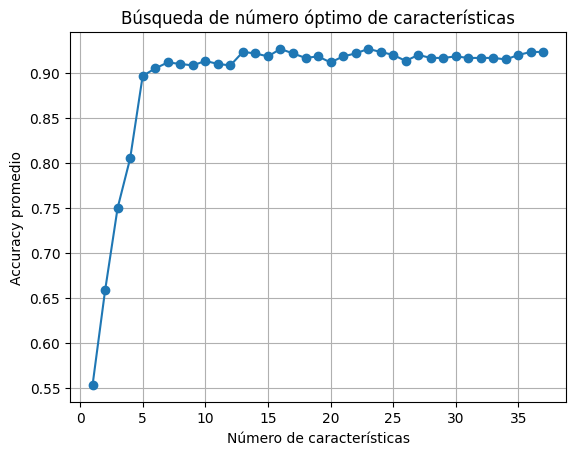


----- GridSearchCV con features óptimas -----
✅ Mejor valor de C: 0.026366508987303555

--- Evaluación final (CV externa con C óptima y features óptimas) ---
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        60
         2.0       0.90      0.90      0.90       100
         3.0       0.98      0.93      0.95       100
         4.0       0.89      0.94      0.91       120
         5.0       0.94      0.99      0.96       110
         6.0       0.93      0.89      0.91       110

    accuracy                           0.93       600
   macro avg       0.94      0.93      0.94       600
weighted avg       0.93      0.93      0.93       600



In [31]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Buscar número óptimo de características
n_feats = list(range(1, 38))
acc_nfeat = []

for n_feat in n_feats:
    print(f"---- n features = {n_feat}")
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(x, y):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]

        base_model = SVC(kernel='linear')
        selector = RFE(base_model, n_features_to_select=n_feat)
        selector.fit(x_train, y_train)

        x_train_sel = selector.transform(x_train)
        x_test_sel = selector.transform(x_test)

        base_model.fit(x_train_sel, y_train)
        y_pred = base_model.predict(x_test_sel)

        acc_cv.append(accuracy_score(y_test, y_pred))

    acc = np.mean(acc_cv)
    acc_nfeat.append(acc)
    print("ACC:", acc)

# Elegir número óptimo de características
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("\n✅ Optimal number of features:", opt_features)

# Graficar
plt.plot(n_feats, acc_nfeat, marker='o')
plt.xlabel("Número de características")
plt.ylabel("Accuracy promedio")
plt.title("Búsqueda de número óptimo de características")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# Reentrenar modelo con las features óptimas + GridSearchCV
# ---------------------------------------------------------
print("\n----- GridSearchCV con features óptimas -----")
selector = RFE(SVC(kernel='linear'), n_features_to_select=opt_features)
x_selected = selector.fit_transform(x, y)

parameters = {'C': np.logspace(-6, 1, 20)}
grid_search = GridSearchCV(SVC(kernel='linear'), parameters, cv=5)
grid_search.fit(x_selected, y)

print("✅ Mejor valor de C:", grid_search.best_params_['C'])

# Evaluación final
final_model = SVC(kernel='linear', C=grid_search.best_params_['C'])
final_model.fit(x_selected, y)

print("\n--- Evaluación final (CV externa con C óptima y features óptimas) ---")
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test, cv_y_pred = [], []

for train_index, test_index in kf.split(x, y):
    x_train, y_train = x[train_index], y[train_index]
    x_test, y_test = x[test_index], y[test_index]

    x_train_sel = selector.transform(x_train)
    x_test_sel = selector.transform(x_test)

    final_model.fit(x_train_sel, y_train)
    y_pred = final_model.predict(x_test_sel)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


OPTIMIZACIÓN PARTE DE XIMENA

----- Random Forest - Variación de n_estimators -----
n_estimators = 10
Accuracy promedio: 0.9266666666666667
n_estimators = 30
Accuracy promedio: 0.9383333333333332
n_estimators = 50
Accuracy promedio: 0.95
n_estimators = 70
Accuracy promedio: 0.9433333333333334
n_estimators = 90
Accuracy promedio: 0.9466666666666667
n_estimators = 110
Accuracy promedio: 0.9383333333333332
n_estimators = 130
Accuracy promedio: 0.9466666666666667
n_estimators = 150
Accuracy promedio: 0.95
n_estimators = 170
Accuracy promedio: 0.9400000000000001
n_estimators = 190
Accuracy promedio: 0.945


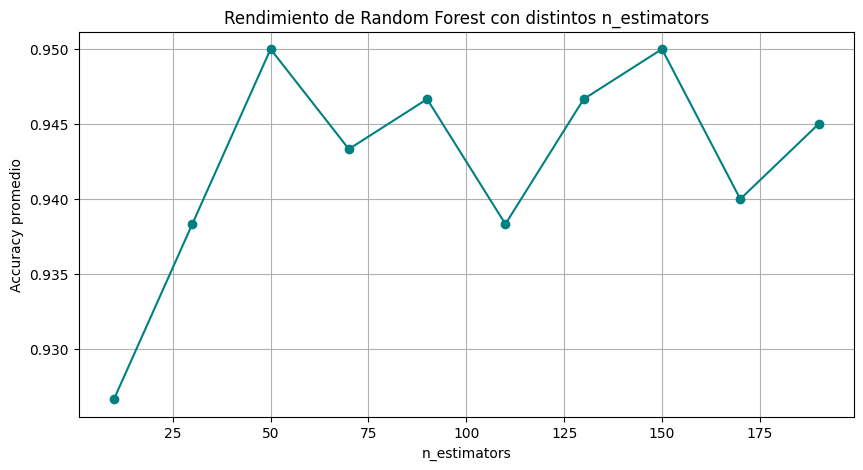


----- Selección de características con SelectKBest + f_classif -----

Probando con 5 características


NameError: name 'SelectKBest' is not defined

In [26]:
from sklearn.ensemble import RandomForestClassifier


# ------------------ A) Carga de datos -------------------

y = data.iloc[:, 0].values
x = data.iloc[:, 1:].values
features = data.columns[1:].tolist()

# ------------------ B) Gráfica rendimiento por n_estimators -------------------
print("----- Random Forest - Variación de n_estimators -----")

n_estimators_range = np.arange(10, 210, 20)
acc = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for n in n_estimators_range:
    print(f'n_estimators = {n}')
    acc_cv = []

    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = RandomForestClassifier(n_estimators=n)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc_cv.append(accuracy_score(y_test, y_pred))

    acc_avg = np.mean(acc_cv)
    acc.append(acc_avg)
    print("Accuracy promedio:", acc_avg)

plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, acc, marker='o', color='teal')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy promedio")
plt.title("Rendimiento de Random Forest con distintos n_estimators")
plt.grid(True)
plt.show()

# ------------------ C) Selección de características (filter) -------------------
print("\n----- Selección de características con SelectKBest + f_classif -----")

feature_counts = list(range(5, min(101, x.shape[1]+1), 5))
accuracies = []
selected_features_list = []

for k in feature_counts:
    print(f"\nProbando con {k} características")

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        selector = SelectKBest(score_func=f_classif, k=min(k, x.shape[1]))
        selector.fit(x_train, y_train)

        x_train_sel = selector.transform(x_train)
        x_test_sel = selector.transform(x_test)

        clf = RandomForestClassifier()
        clf.fit(x_train_sel, y_train)
        y_pred = clf.predict(x_test_sel)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    all_y_test = np.concatenate(cv_y_test)
    all_y_pred = np.concatenate(cv_y_pred)
    acc = accuracy_score(all_y_test, all_y_pred)
    accuracies.append(acc)

    selected_idx = selector.get_support(indices=True)
    selected_names = np.array(features)[selected_idx]
    selected_features_list.append(selected_names)

    print(f"Accuracy promedio: {acc:.4f}")
    print(f"Características seleccionadas: {selected_names}")

plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracies, marker='o', color='navy')
plt.title("Accuracy vs Número de características seleccionadas")
plt.xlabel("Número de características")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

best_idx = np.argmax(accuracies)
print("\n----- Mejor configuración de características -----")
print(f"Mejor número de características: {feature_counts[best_idx]}")
print(f"Accuracy promedio: {accuracies[best_idx]:.4f}")
print(f"Características seleccionadas: {selected_features_list[best_idx]}")

# ------------------ D) Validación cruzada anidada -------------------
print("\n----- Validación cruzada anidada: selección de características + optimización de n_estimators -----")

cv_y_test = []
cv_y_pred = []
best_n_list = []
best_feats_list = []

outer_kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in outer_kf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #Selección de características con filtro (SelectKBest)
    selector = SelectKBest(score_func=f_classif, k=feature_counts[best_idx])
    selector.fit(x_train, y_train)

    x_train_sel = selector.transform(x_train)
    x_test_sel = selector.transform(x_test)

    selected_idx = selector.get_support(indices=True)
    selected_names = np.array(features)[selected_idx]
    best_feats_list.append(selected_names)

    #GridSearch interno para encontrar el mejor n_estimators
    param_grid = {'n_estimators': np.arange(10, 210, 20)}
    grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
    grid.fit(x_train_sel, y_train)

    best_n = grid.best_params_['n_estimators']
    best_n_list.append(best_n)

    #Evaluar en conjunto externo
    y_pred = grid.predict(x_test_sel)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

y_true = np.concatenate(cv_y_test)
y_pred_final = np.concatenate(cv_y_pred)

print("\n----- Resultados finales de validación cruzada anidada -----")
print("Valores óptimos de n_estimators en cada fold:", best_n_list)
print("n_estimators más frecuente:", max(set(best_n_list), key=best_n_list.count))
print("Accuracy promedio:", accuracy_score(y_true, y_pred_final))
print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred_final))
print("\nCaracterísticas más comúnmente seleccionadas (primer fold de ejemplo):")
print(best_feats_list[0])

---- n features = 1
ACC: 0.7583333333333334
---- n features = 2
ACC: 0.8333333333333333
---- n features = 3
ACC: 0.8833333333333332
---- n features = 4
ACC: 0.8916666666666668
---- n features = 5
ACC: 0.8983333333333334
---- n features = 6
ACC: 0.9166666666666666
---- n features = 7
ACC: 0.9166666666666667
---- n features = 8
ACC: 0.9199999999999999
---- n features = 9
ACC: 0.925
---- n features = 10
ACC: 0.925
---- n features = 11
ACC: 0.93
---- n features = 12
ACC: 0.9216666666666666
---- n features = 13
ACC: 0.9416666666666667
---- n features = 14
ACC: 0.9383333333333332
---- n features = 15
ACC: 0.9333333333333333
---- n features = 16
ACC: 0.9383333333333332
---- n features = 17
ACC: 0.9466666666666667
---- n features = 18
ACC: 0.9466666666666665
---- n features = 19
ACC: 0.9483333333333335
---- n features = 20
ACC: 0.9516666666666665
---- n features = 21
ACC: 0.9466666666666667
---- n features = 22
ACC: 0.9466666666666667
---- n features = 23
ACC: 0.945
---- n features = 24
ACC: 0

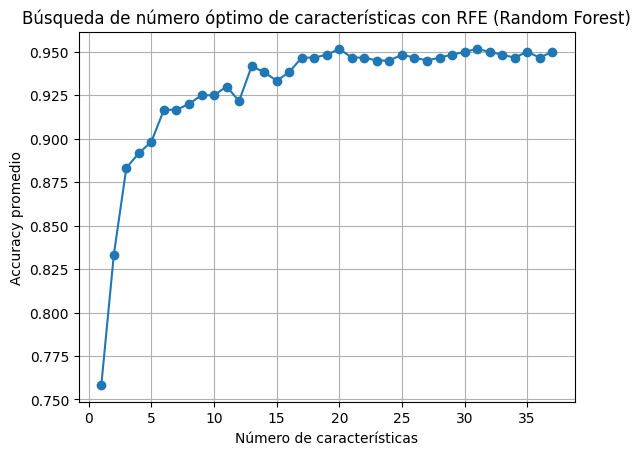


----- GridSearchCV con features óptimas -----
✅ Mejor valor de n_estimators: 300

--- Evaluación final (CV externa con n_estimators óptimo y features óptimas) ---
              precision    recall  f1-score   support

         1.0       0.97      0.93      0.95        60
         2.0       0.93      0.95      0.94       100
         3.0       0.96      0.91      0.93       100
         4.0       0.93      0.93      0.93       120
         5.0       0.93      0.98      0.96       110
         6.0       0.93      0.92      0.92       110

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Buscar número óptimo de características
n_feats = list(range(1, x.shape[1] + 1))  # hasta el número total de features que tengas
acc_nfeat = []

for n_feat in n_feats:
    print(f"---- n features = {n_feat}")
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(x, y):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]

        base_model = RandomForestClassifier(random_state=42)
        selector = RFE(base_model, n_features_to_select=n_feat)
        selector.fit(x_train, y_train)

        x_train_sel = selector.transform(x_train)
        x_test_sel = selector.transform(x_test)

        base_model.fit(x_train_sel, y_train)
        y_pred = base_model.predict(x_test_sel)

        acc_cv.append(accuracy_score(y_test, y_pred))

    acc = np.mean(acc_cv)
    acc_nfeat.append(acc)
    print("ACC:", acc)

# Elegir número óptimo de características
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("\n✅ Optimal number of features:", opt_features)

# Graficar
plt.plot(n_feats, acc_nfeat, marker='o')
plt.xlabel("Número de características")
plt.ylabel("Accuracy promedio")
plt.title("Búsqueda de número óptimo de características con RFE (Random Forest)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# Reentrenar modelo con las features óptimas + GridSearchCV
# ---------------------------------------------------------
print("\n----- GridSearchCV con features óptimas -----")
selector = RFE(RandomForestClassifier(random_state=42), n_features_to_select=opt_features)
x_selected = selector.fit_transform(x, y)

parameters = {'n_estimators': [10, 50, 100, 150, 200, 300]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5)
grid_search.fit(x_selected, y)

print("✅ Mejor valor de n_estimators:", grid_search.best_params_['n_estimators'])

# Evaluación final
final_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], random_state=42)
final_model.fit(x_selected, y)

print("\n--- Evaluación final (CV externa con n_estimators óptimo y features óptimas) ---")
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test, cv_y_pred = [], []

for train_index, test_index in kf.split(x, y):
    x_train, y_train = x[train_index], y[train_index]
    x_test, y_test = x[test_index], y[test_index]

    x_train_sel = selector.transform(x_train)
    x_test_sel = selector.transform(x_test)

    final_model.fit(x_train_sel, y_train)
    y_pred = final_model.predict(x_test_sel)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
